In [1]:
import numpy as np 
import pandas as pd 
import math 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import RFE

In [2]:
data = pd.read_csv("BankChurners.csv")
data = data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
list(data.columns)

['CLIENTNUM',
 'Attrition_Flag',
 'Customer_Age',
 'Gender',
 'Dependent_count',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [5]:
data.shape

(10127, 21)

In [6]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


array([[<Axes: title={'center': 'CLIENTNUM'}>,
        <Axes: title={'center': 'Customer_Age'}>,
        <Axes: title={'center': 'Dependent_count'}>],
       [<Axes: title={'center': 'Months_on_book'}>,
        <Axes: title={'center': 'Total_Relationship_Count'}>,
        <Axes: title={'center': 'Months_Inactive_12_mon'}>],
       [<Axes: title={'center': 'Contacts_Count_12_mon'}>,
        <Axes: title={'center': 'Credit_Limit'}>,
        <Axes: title={'center': 'Total_Revolving_Bal'}>],
       [<Axes: title={'center': 'Avg_Open_To_Buy'}>,
        <Axes: title={'center': 'Total_Amt_Chng_Q4_Q1'}>,
        <Axes: title={'center': 'Total_Trans_Amt'}>],
       [<Axes: title={'center': 'Total_Trans_Ct'}>,
        <Axes: title={'center': 'Total_Ct_Chng_Q4_Q1'}>,
        <Axes: title={'center': 'Avg_Utilization_Ratio'}>]], dtype=object)

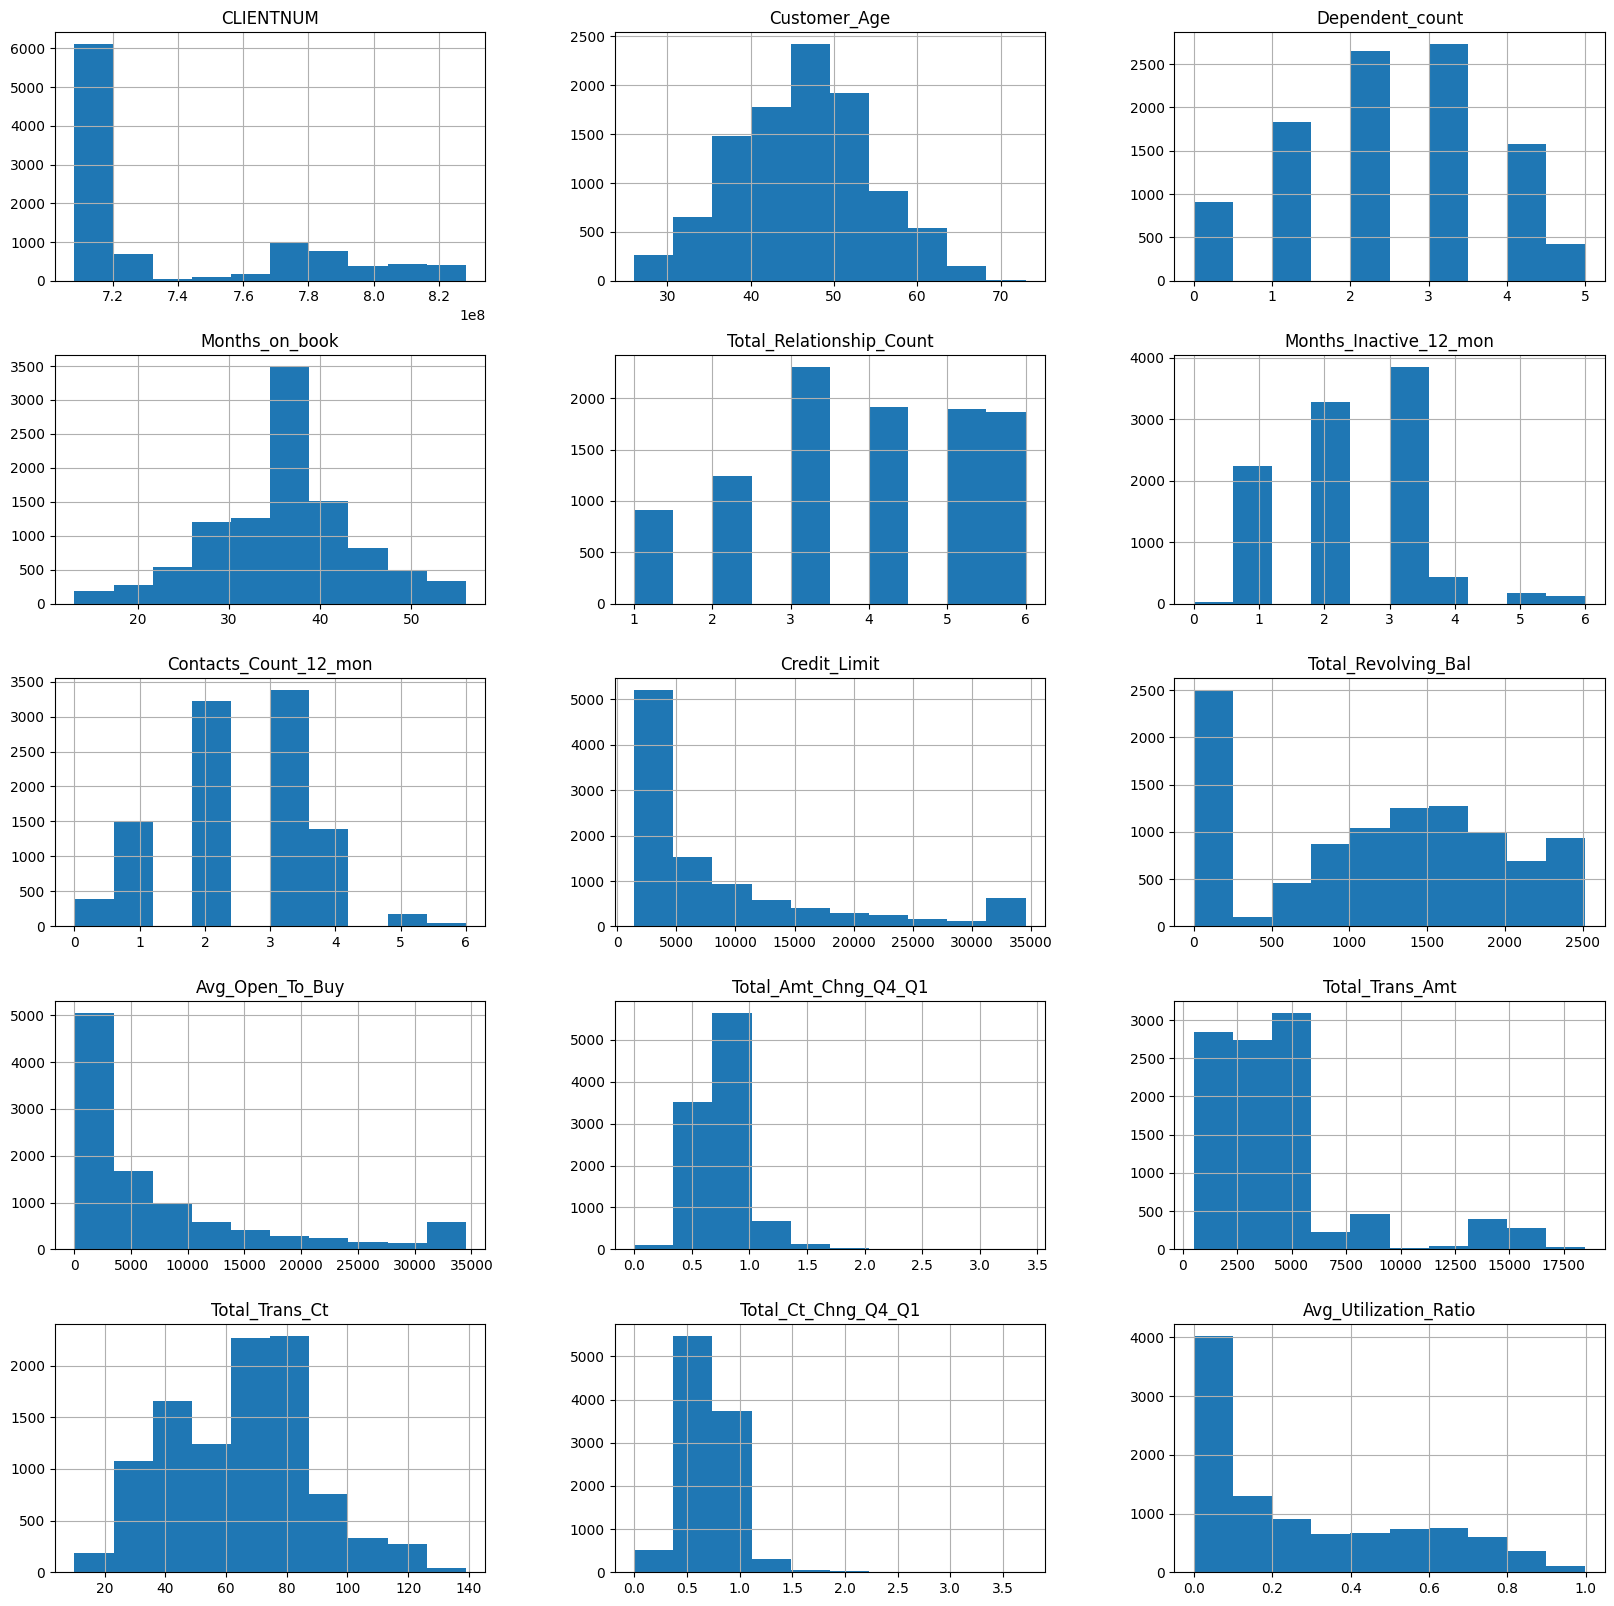

In [7]:
#define format for subplots (1 row and 3 columns)
fig, axis = plt.subplots(5, 3, figsize = (20,20))

#create histogram for each column in DataFrame
data.hist(ax=axis)

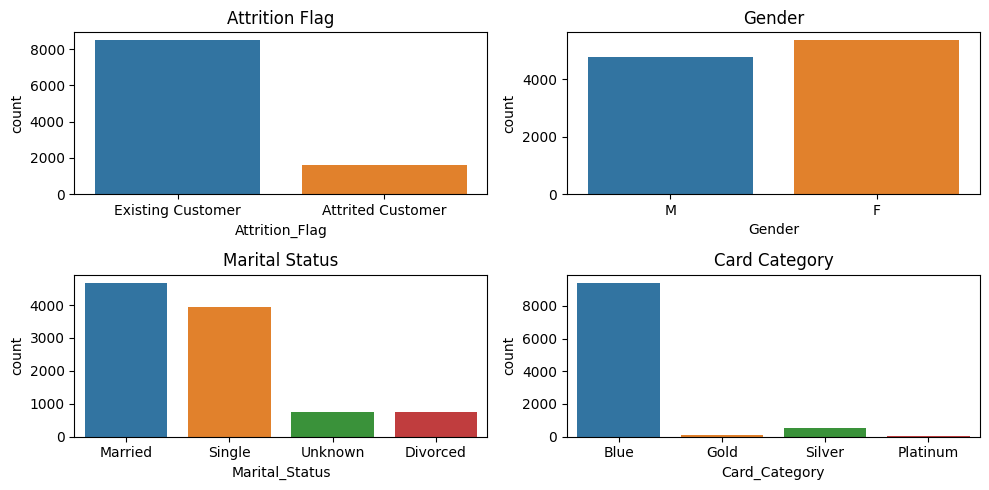

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5))  # 1 row, 2 columns

# Plot 1
sns.countplot(x='Attrition_Flag', data = data, ax=axes[0,0])
axes[0,0].set_title('Attrition Flag')

# Plot 2
sns.countplot(x='Gender', data = data, ax=axes[0,1])
axes[0,1].set_title('Gender')

# Plot 3
sns.countplot(x='Marital_Status', data = data, ax=axes[1,0])
axes[1,0].set_title('Marital Status')

# Plot 4
sns.countplot(x='Card_Category', data = data, ax=axes[1,1])
axes[1,1].set_title('Card Category')

# Add spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

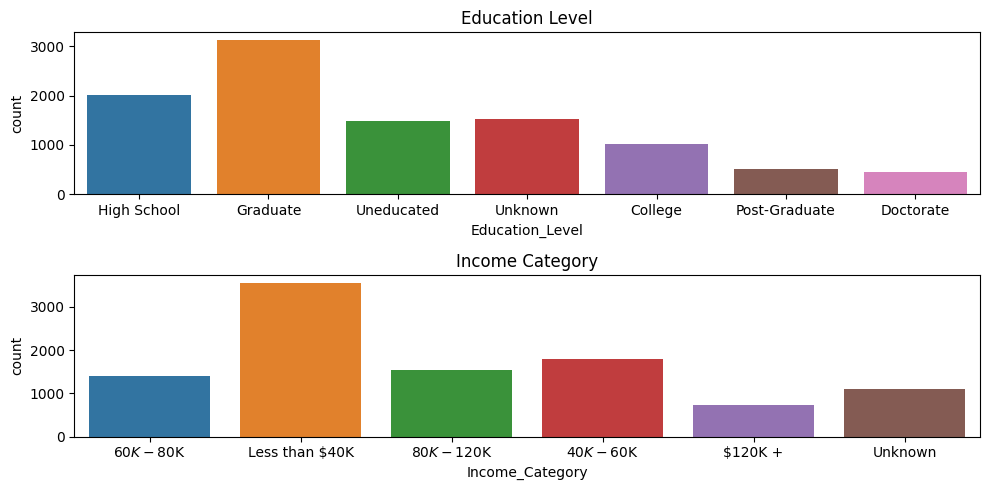

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(10, 5))  # 1 row, 2 columns

# Plot 5
sns.countplot(x='Education_Level', data = data, ax=axes[0])
axes[0].set_title('Education Level')

# Plot 6
sns.countplot(x='Income_Category', data = data, ax=axes[1])
axes[1].set_title('Income Category')

# Add spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [10]:
data = pd.get_dummies(data, columns=['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Gender'])
data['Attrition_Flag'] = data['Attrition_Flag'].replace({'Attrited Customer': 0, 'Existing Customer': 1})

In [11]:
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Gender_F,Gender_M
0,768805383,1,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
1,818770008,1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
2,713982108,1,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1
3,769911858,1,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0
4,709106358,1,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [12]:
y = data['Attrition_Flag']

In [13]:
X = data.drop('Attrition_Flag', axis=1)

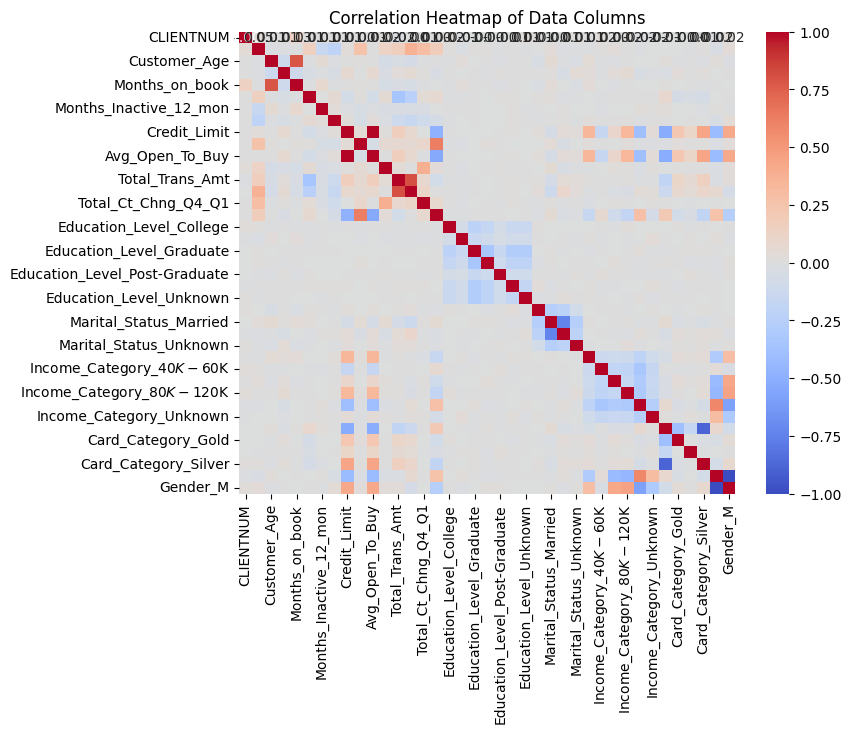

In [14]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Data Columns')
plt.show()

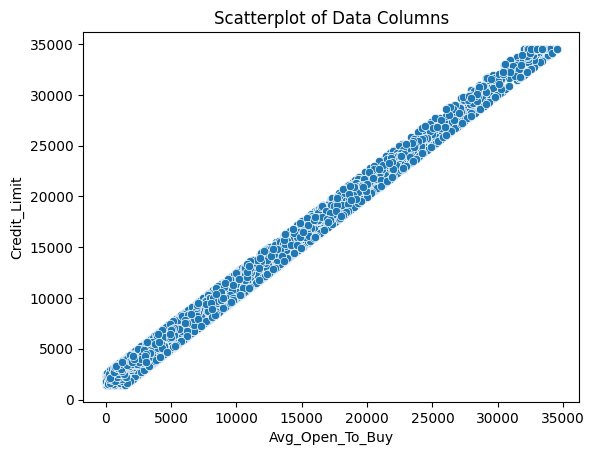

In [15]:
sns.scatterplot(x = 'Avg_Open_To_Buy',y = 'Credit_Limit',data=data)
plt.title('Scatterplot of Data Columns')
plt.xlabel('Avg_Open_To_Buy')
plt.ylabel('Credit_Limit')
plt.show()
#Highly Correlated. 

In [16]:
# Highly correlated with Credit Limit, and I don't really understand the variable
X = X.drop('Avg_Open_To_Buy', axis=1)

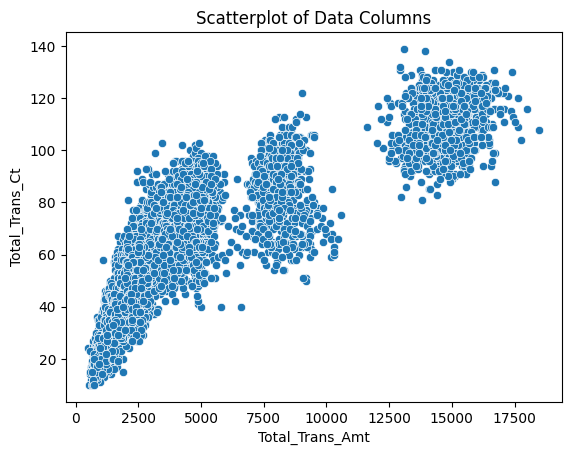

In [17]:
sns.scatterplot(x = 'Total_Trans_Amt',y = 'Total_Trans_Ct',data=data)
plt.title('Scatterplot of Data Columns')
plt.xlabel('Total_Trans_Amt')
plt.ylabel('Total_Trans_Ct')
plt.show()
# ct means count, amt means amount. makes sense

In [18]:
#Potential Hypothesis 
#Customers who aren't using much credit tend to leave. 
#Customers who are using too much credit leave. 
#Customers who are churning (Short period of usage and no usage after)

In [19]:
#Logistic Regression

In [20]:
#Reducing imbalances from data (important so model doesn't bias one side)
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )

In [21]:
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y == 0]))
print("Number of subscription",len(os_data_y[os_data_y == 1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y == 0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y == 1])/len(os_data_X))

length of oversampled data is  11834
Number of no subscription in oversampled data 5917
Number of subscription 5917
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [22]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(os_data_X)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, os_data_y)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.61      0.66       456
           1       0.93      0.96      0.95      2583

    accuracy                           0.91      3039
   macro avg       0.82      0.79      0.80      3039
weighted avg       0.90      0.91      0.90      3039

Confusion Matrix:
[[ 280  176]
 [ 111 2472]]


In [23]:
os_data_X.columns

Index(['CLIENTNUM', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct',
       'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver', 'Gender_F',
     

In [24]:
rfe = RFE(model, step = 1)
rfe = rfe.fit(X_train_scaled, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False  True  True
 False False False False  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True False False False False  True
  True]
[10 16 13 20  7  9  8 12  5 17  1  1  6 19  2  4  1  1  3  1  1  1  1  1
  1  1  1  1  1  1  1 11 15 18 14  1  1]


In [25]:
final_columns = os_data_X.columns[rfe.support_]

In [26]:
rfe_X_train = X_train_scaled[:,rfe.support_]
rfe_X_test = X_test_scaled[:,rfe.support_]

In [27]:
import statsmodels.api as sm
logit_model=sm.Logit(os_data_y,os_data_X)
result=logit_model.fit()
print(result.summary2())
#Findings align with RFE 

Optimization terminated successfully.
         Current function value: 0.163668
         Iterations 10
                                Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.764    
Dependent Variable:      Attrition_Flag        AIC:                   3947.6890
Date:                    2024-03-26 23:52      BIC:                   4220.7021
No. Observations:        11834                 Log-Likelihood:        -1936.8  
Df Model:                36                    LL-Null:               -8202.7  
Df Residuals:            11797                 LLR p-value:           0.0000   
Converged:               1.0000                Scale:                 1.0000   
No. Iterations:          10.0000                                               
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------

In [28]:
model.fit(rfe_X_train, os_data_y)

# Make predictions
y_pred = model.predict(rfe_X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.32      0.37       456
           1       0.89      0.92      0.90      2583

    accuracy                           0.83      3039
   macro avg       0.65      0.62      0.63      3039
weighted avg       0.82      0.83      0.82      3039

Confusion Matrix:
[[ 147  309]
 [ 202 2381]]


In [29]:
rfe_X_train = pd.DataFrame(rfe_X_train, columns = final_columns)

In [30]:
import statsmodels.api as sm
logit_model=sm.Logit(os_data_y,rfe_X_train)
result=logit_model.fit()
print(result.summary2())
#Findings align with RFE 

Optimization terminated successfully.
         Current function value: 0.244480
         Iterations 8
                                Results: Logit
Model:                   Logit                 Pseudo R-squared:      0.647    
Dependent Variable:      Attrition_Flag        AIC:                   5822.3583
Date:                    2024-03-26 23:52      BIC:                   5955.1755
No. Observations:        11834                 Log-Likelihood:        -2893.2  
Df Model:                17                    LL-Null:               -8202.7  
Df Residuals:            11816                 LLR p-value:           0.0000   
Converged:               1.0000                Scale:                 1.0000   
No. Iterations:          8.0000                                                
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------

In [31]:
#Negative Coeffecient for Total_Trans_Amt, potentially meaning that higher spending leads to customers leaving 
#However, positive coefficient for Total_Trans_Ct so we want high usage
#indicates whether or not someone uses a main card 